## Food Marts Advertising Analysis.

In [1]:
# imported requried libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
data=pd.read_csv("D:\Vijay\Python_Datasets\Cost Prediction\media prediction and its cost.csv")

### Data Cleaning

In [4]:
data.dtypes.value_counts() # To check  how many numerical and categorical features 

float64    23
object     17
dtype: int64

In [5]:
data.sample(5) # To take oveview of data

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
38712,Snack Foods,Snack Foods,Food,11.46,4.2402,3.0,Save-It Sale,USA,M,M,...,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Daily Paper,81.79
31553,Jams and Jellies,Baking Goods,Food,3.96,1.9800,2.0,I Cant Believe It Sale,USA,S,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Daily Paper, Radio",115.85
16997,Baking Goods,Baking Goods,Food,4.80,2.0640,3.0,Super Duper Savers,USA,S,M,...,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,Cash Register Handout,129.50
16277,Carbonated Beverages,Beverages,Drink,2.88,1.1232,3.0,Free For All,USA,M,F,...,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio",126.24
34298,Paper Products,Household,Non-Consumable,10.88,4.3520,4.0,Saving Days,USA,S,F,...,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Product Attachment,83.26


In [6]:
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [7]:
data.isnull().sum()  # checking for missing values

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [8]:
data.duplicated().sum()  # checking for duplicates

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [10]:
data['total_children']=data['total_children'].astype('int8') # to change datatypes of variables

In [11]:
data['total_children'].dtypes

dtype('int8')

In [12]:
data['avg_cars_at home(approx).1']=data['avg_cars_at home(approx).1'].astype('int8')

In [13]:
data['num_children_at_home']=data['num_children_at_home'].astype('int8')

In [14]:
data['units_per_case'].sample(10)
data['units_per_case']=data['units_per_case'].astype('int8')

In [15]:
data['coffee_bar'].value_counts()
data['coffee_bar']=data['coffee_bar'].astype('int8')

In [16]:
data['video_store'].value_counts()
data['video_store']=data['video_store'].astype('int8')

In [17]:
data['salad_bar'].value_counts()
data['salad_bar']=data['salad_bar'].astype('int8')


In [18]:
data['prepared_food']=data['prepared_food'].astype('int8')


In [19]:
data['florist']=data['florist'].astype('int8')

In [20]:
data['recyclable_package']=data['recyclable_package'].astype('int8')

In [21]:
del data['avg_cars_at home(approx)']  #repeated column

In [22]:
data['low_fat']=data['low_fat'].astype('int8')

In [23]:
data.dtypes.value_counts()

object     17
float64    11
int8       11
dtype: int64

In [24]:
data.info() # reduced size of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  int8   
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [25]:
data['food_department'].value_counts().shape[0] # for checking how many unique values in the specific categorical feature

22

In [26]:
data['media_type'].value_counts().shape[0]

13

In [27]:
data['sales_country'].value_counts()

USA       38892
Mexico    17572
Canada     3964
Name: sales_country, dtype: int64

In [28]:

data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1,1,1,1,1,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1,1,1,1,1,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1,1,1,1,1,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1,1,1,1,1,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1,1,1,1,1,Radio,50.79


D:\AnaCondaPath\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


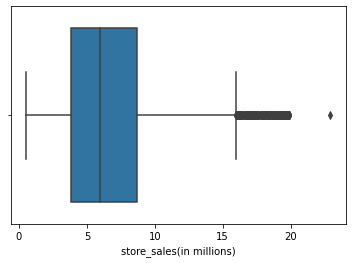

C:\Users\Katem\AppData\Local\Temp\ipykernel_10944\1891560311.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_sales(in millions)'][data['store_sales(in millions)'] < min1]= np.nan
C:\Users\Katem\AppData\Local\Temp\ipykernel_10944\1891560311.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_sales(in millions)'][data['store_sales(in millions)']> max1]= np.nan


In [29]:
# To detect and handle outliers
sns.boxplot(data['store_sales(in millions)'])
plt.show()
q75=np.percentile(data['store_sales(in millions)'],75)
q25 =np.percentile(data['store_sales(in millions)'],25)
intr_qr = q75-q25
max1 = q75+(1.5*intr_qr)
min1 = q25-(1.5*intr_qr)
data['store_sales(in millions)'][data['store_sales(in millions)'] < min1]= np.nan
data['store_sales(in millions)'][data['store_sales(in millions)']> max1]= np.nan 
# replaced all the outliers with nan values

In [30]:
data['store_sales(in millions)'].isnull().sum() # number of outliers

325

In [31]:
data.dropna(inplace=True) # Removed outliers from data

In [32]:
data['store_sales(in millions)'].isnull().sum()

0

D:\AnaCondaPath\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


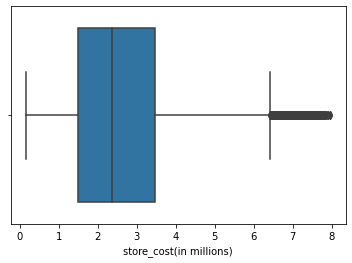

C:\Users\Katem\AppData\Local\Temp\ipykernel_10944\3032760354.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_cost(in millions)'][data['store_cost(in millions)'] < min1]= np.nan
C:\Users\Katem\AppData\Local\Temp\ipykernel_10944\3032760354.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_cost(in millions)'][data['store_cost(in millions)']> max1]= np.nan


In [33]:
sns.boxplot(data['store_cost(in millions)'])
plt.show()
q75=np.percentile(data['store_cost(in millions)'],75)
q25 =np.percentile(data['store_cost(in millions)'],25)
intr_qr = q75-q25
max1 = q75+(1.5*intr_qr)
min1 = q25-(1.5*intr_qr)
data['store_cost(in millions)'][data['store_cost(in millions)'] < min1]= np.nan
data['store_cost(in millions)'][data['store_cost(in millions)']> max1]= np.nan 


In [34]:

data['store_cost(in millions)'].isnull().sum()


801

In [35]:
data.dropna(inplace=True)

In [36]:
data['store_cost(in millions)'].isnull().sum()

0

D:\AnaCondaPath\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cost'>

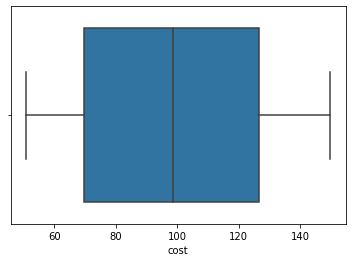

In [37]:
sns.boxplot(data['cost'])

D:\AnaCondaPath\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SRP'>

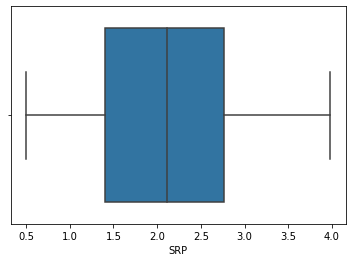

In [38]:
sns.boxplot(data['SRP'])

### Exploratory Data Analysis

In [39]:
# differnt food categories 
data['food_category'].unique().shape[0]

45

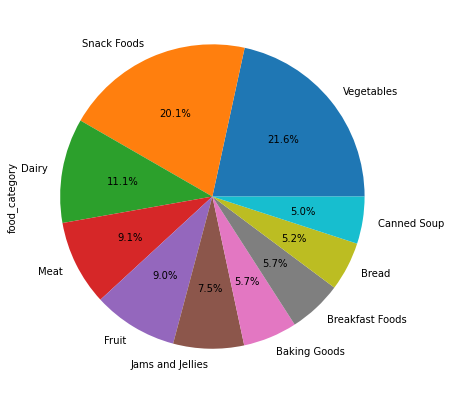

In [40]:

# top 10 most used food categoroes in stores
plt.figure(figsize=(7,7))
data['food_category'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [41]:
data['food_department'].unique().shape[0]

22

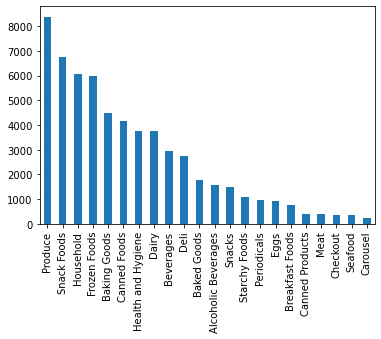

In [42]:
# customers belongs to food department
data['food_department'].value_counts().plot(kind='bar')
plt.show()

In [43]:
data['food_family'].unique().shape[0]

3

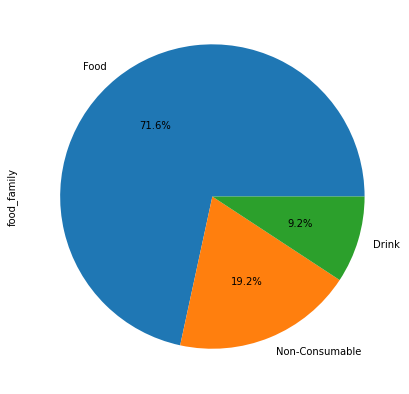

In [44]:
plt.figure(figsize=(7,7))
data['food_family'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()


In [45]:
data1=data.copy() # making copy of data for further analysis

In [46]:
data['promotion_name'].unique().shape[0]

49

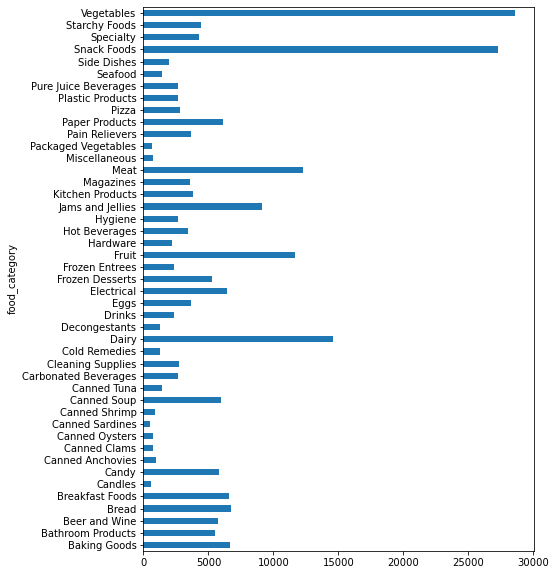

In [47]:
# creating new feature profit in data
# To know which food categories making maximum profit
data['profit']=data['store_sales(in millions)']-data['store_cost(in millions)']
plt.figure(figsize=(7,10))
data.groupby('food_category')['profit'].sum().plot(kind='barh')
plt.show()

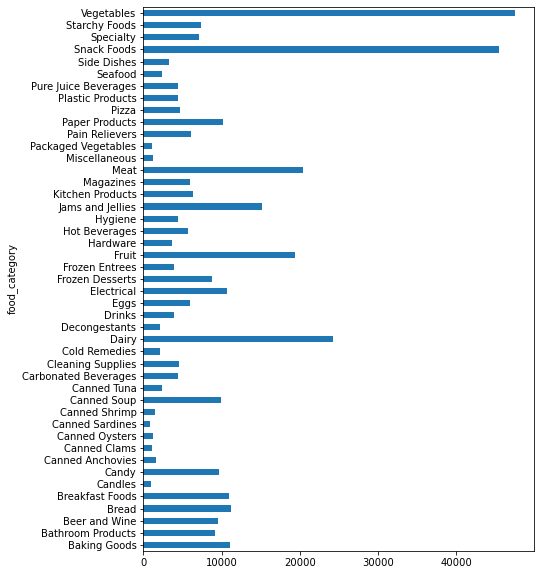

In [48]:
# Sales of food categories
plt.figure(figsize=(7,10))
data.groupby('food_category')['store_sales(in millions)'].sum().plot(kind='barh')
plt.show()

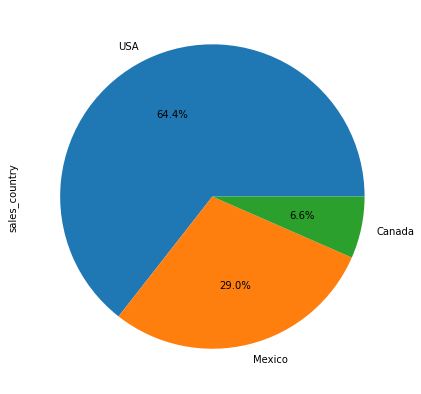

In [49]:
# country wise distribution of food marts
plt.figure(figsize=(7,7))
data['sales_country'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()


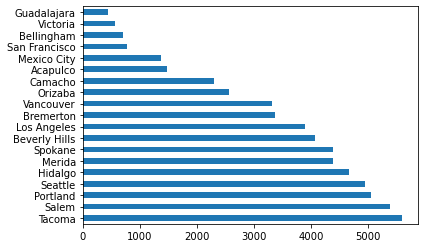

In [50]:
#city in which number of stores are there
data['store_city'].value_counts().plot(kind='barh')
plt.show()

In [51]:
data.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,profit
count,59302.000000,59302.000000,59302.000000,59302.000000,59302.000000,59302.000000,59302.000000,59302.000000,59302.000000,59302.000000,...,59302.000000,59302.000000,59302.000000,59302.000000,59302.000000,59302.000000,59302.000000,59302.000000,59302.000000,59302.000000
mean,6.364891,2.536258,3.068767,2.520387,0.825267,2.199015,2.086509,13.806258,11.797534,0.558784,...,19130.104364,5311.020101,3540.624886,0.612880,0.354086,0.587316,0.587316,0.562426,99.237117,3.828632
std,3.240490,1.330750,0.813222,1.488124,1.299849,1.109852,0.916822,4.621782,4.684333,0.496537,...,3985.720144,1574.615740,1049.610613,0.487096,0.478239,0.492321,0.492321,0.496092,30.007140,2.017332
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,0.000000,...,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000,0.265200
25%,3.780000,1.482675,3.000000,1.000000,0.000000,1.000000,1.400000,9.700000,7.710000,0.000000,...,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000,2.262000
50%,5.860000,2.352400,3.000000,3.000000,0.000000,2.000000,2.110000,13.600000,11.600000,1.000000,...,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000,3.549600
75%,8.520000,3.407875,4.000000,4.000000,1.000000,3.000000,2.760000,17.700000,16.000000,1.000000,...,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000,5.094400
max,15.950000,6.417600,6.000000,5.000000,5.000000,4.000000,3.980000,21.900000,20.800000,1.000000,...,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000,11.144000


In [52]:
#Univariate data analysis
#understanding disribution of numerical variables variables

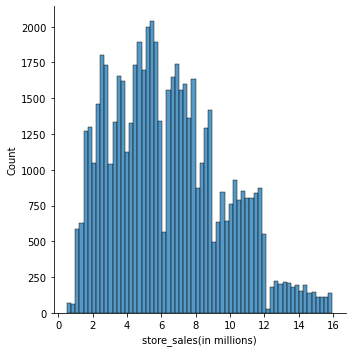

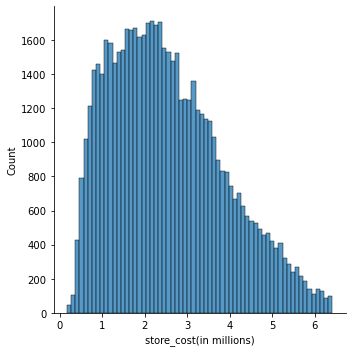

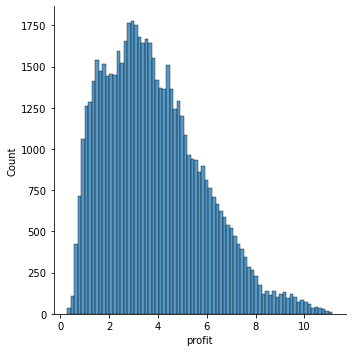

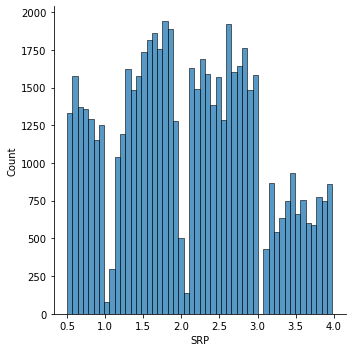

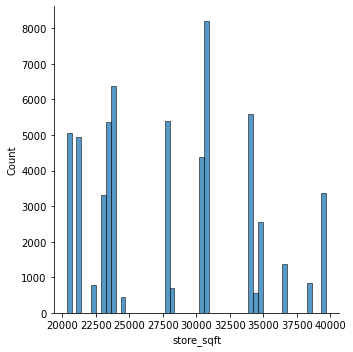

In [53]:
sns.displot(data=data,x='store_sales(in millions)')
sns.displot(data=data,x='store_cost(in millions)')
sns.displot(data=data,x='profit')
sns.displot(data=data,x='SRP')
sns.displot(data=data,x='store_sqft')

plt.show()

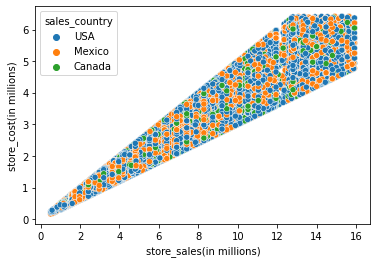

In [54]:
sns.scatterplot(data=data, x='store_sales(in millions)', y='store_cost(in millions)',hue='sales_country')
plt.show()

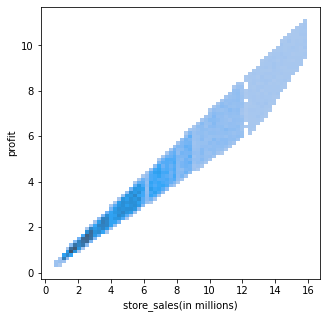

In [55]:
# To analyse profit and sale Bivariate histogram
plt.figure(figsize=(5,5))
sns.histplot(data=data, x='store_sales(in millions)', y='profit')
plt.show()

In [56]:
data.corr()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,profit
store_sales(in millions),1.000000,0.951009,0.466433,0.061874,0.025470,0.000495,0.830890,0.039582,0.035946,0.038141,...,0.009046,0.016463,0.016460,-0.030288,0.020828,0.031217,0.031217,0.033192,-0.007986,0.978983
store_cost(in millions),0.951009,1.000000,0.442372,0.057608,0.019953,-0.001103,0.794821,0.037964,0.034546,0.034307,...,0.011131,0.017075,0.017072,-0.028924,0.020935,0.032253,0.032253,0.033145,-0.007817,0.867971
unit_sales(in millions),0.466433,0.442372,1.000000,0.150072,0.062847,0.022111,-0.051125,0.001229,0.001555,0.001724,...,0.024856,0.030406,0.030401,-0.058890,0.036120,0.058669,0.058669,0.057784,-0.016959,0.457427
total_children,0.061874,0.057608,0.150072,1.000000,0.395850,0.096705,-0.013327,-0.000498,0.000052,0.003262,...,0.018138,-0.028544,-0.028540,0.002897,-0.001045,-0.014606,-0.014606,-0.003049,-0.004295,0.061388
num_children_at_home,0.025470,0.019953,0.062847,0.395850,1.000000,0.131610,-0.005354,-0.002204,-0.002443,0.001806,...,0.024409,-0.024425,-0.024418,-0.016921,-0.013725,-0.024565,-0.024565,-0.009104,-0.002730,0.027750
avg_cars_at home(approx).1,0.000495,-0.001103,0.022111,0.096705,0.131610,1.000000,-0.010510,0.003956,0.003538,0.003649,...,-0.018186,-0.008511,-0.008507,-0.002533,0.014013,-0.009367,-0.009367,-0.004311,0.011278,0.001522
SRP,0.830890,0.794821,-0.051125,-0.013327,-0.005354,-0.010510,1.000000,0.045088,0.040771,0.044258,...,-0.002150,0.002479,0.002479,0.000922,0.002075,0.000788,0.000788,0.003920,0.000415,0.810368
gross_weight,0.039582,0.037964,0.001229,-0.000498,-0.002204,0.003956,0.045088,1.000000,0.988920,0.053491,...,-0.004401,-0.003978,-0.003978,0.002429,0.002981,0.002995,0.002995,0.004073,0.001930,0.038539
net_weight,0.035946,0.034546,0.001555,0.000052,-0.002443,0.003538,0.040771,0.988920,1.000000,0.055579,...,-0.003365,-0.003698,-0.003698,0.002400,0.003312,0.003781,0.003781,0.003529,0.002035,0.034952
recyclable_package,0.038141,0.034307,0.001724,0.003262,0.001806,0.003649,0.044258,0.053491,0.055579,1.000000,...,0.000582,-0.000055,-0.000056,-0.000279,0.001822,0.000422,0.000422,-0.001240,-0.002646,0.038636


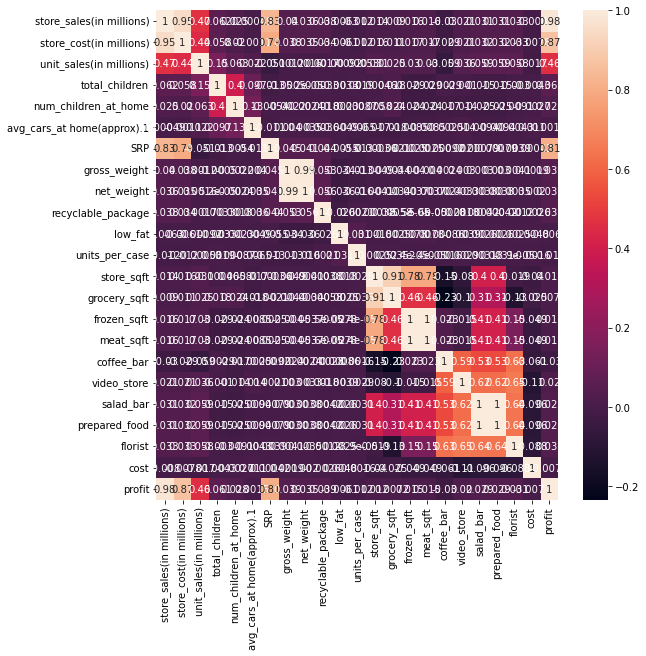

In [57]:
# heatmap for visualizing correlation between variables
plt.figure(figsize=(9,9))
corr=data.corr()
sns.heatmap(corr,annot=True) 
plt.show()

### Machine learning

In [58]:
import scipy.stats as stats

In [59]:
# analysis of variance to see the realtion between cost and categorical variables
cat_var = data.select_dtypes(include='object').columns
for feature in cat_var:
    groups = []
    for value in data[feature].unique():
        groups.append(data[data[feature] == value]['cost'])
    f, p = stats.f_oneway(*groups)
    print(f"Feature: {feature} \nF-value: {f} \nP-value: {p} \n")

Feature: food_category 
F-value: 1.0715296158859742 
P-value: 0.3451880833267251 

Feature: food_department 
F-value: 0.7378614272678353 
P-value: 0.7972910799533597 

Feature: food_family 
F-value: 1.23438707167653 
P-value: 0.2910205554461514 

Feature: promotion_name 
F-value: 444.9274698139318 
P-value: 0.0 

Feature: sales_country 
F-value: 45.081044123362155 
P-value: 2.731620776993938e-20 

Feature: marital_status 
F-value: 0.03355304263763274 
P-value: 0.8546614171777892 

Feature: gender 
F-value: 4.739770585657253 
P-value: 0.02947693113033899 

Feature: education 
F-value: 1.6277285250105749 
P-value: 0.1641195492019691 

Feature: member_card 
F-value: 0.9138516949168072 
P-value: 0.433218323562675 

Feature: occupation 
F-value: 5.897522213626836 
P-value: 9.668932464323502e-05 

Feature: houseowner 
F-value: 0.7274856565267626 
P-value: 0.3937028460459495 

Feature: avg. yearly_income 
F-value: 3.5052570479599963 
P-value: 0.0009179033927889459 

Feature: brand_name 
F-val

from anova testing

promotion_name, sales_country,gender,occupation,avg. yearly_income,store_type,store_city
 store_state,store_state,media_type are strongly correlated with cost of media.

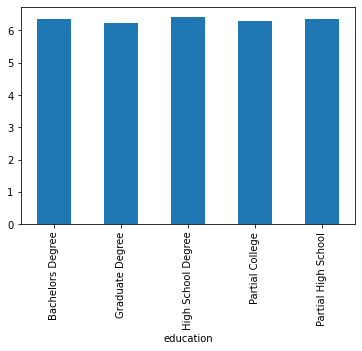

In [60]:
data.groupby('education')['store_sales(in millions)'].mean().plot(kind='bar')
plt.show() # graphically shown  education factor not significantly affecting sales


In [61]:
#Featrue selection
# droping features that are not required
features_to_drop = ['avg_cars_at home(approx).1', 'net_weight', 'meat_sqft', 'salad_bar', 'food_category', 'food_department', 'food_family', 'marital_status', 'education', 'member_card', 'houseowner', 'brand_name']

data1.drop(columns=features_to_drop, inplace=True)

In [62]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59302 entries, 0 to 60427
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   store_sales(in millions)  59302 non-null  float64
 1   store_cost(in millions)   59302 non-null  float64
 2   unit_sales(in millions)   59302 non-null  float64
 3   promotion_name            59302 non-null  object 
 4   sales_country             59302 non-null  object 
 5   gender                    59302 non-null  object 
 6   total_children            59302 non-null  int8   
 7   occupation                59302 non-null  object 
 8   avg. yearly_income        59302 non-null  object 
 9   num_children_at_home      59302 non-null  int8   
 10  SRP                       59302 non-null  float64
 11  gross_weight              59302 non-null  float64
 12  recyclable_package        59302 non-null  int8   
 13  low_fat                   59302 non-null  int8   
 14  units_

In [63]:
# lebel encoding

In [64]:
data1 = pd.get_dummies(data1, columns=['promotion_name','sales_country', 'gender', 'occupation', 'avg. yearly_income', 'store_type', 'store_city', 'store_state', 'media_type'])

In [65]:
data1.dropna(inplace=True)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

X = data1.drop(columns='cost')
y = data1['cost']

train_ratio = 0.8
n_rows = data.shape[0]
train_rows = int(n_rows * train_ratio)
X_train = X[:train_rows]
y_train = y[:train_rows]
X_test = X[train_rows:]
y_test = y[train_rows:]

In [67]:
# Model 1: LASSO regression on cost
X

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,num_children_at_home,SRP,gross_weight,recyclable_package,low_fat,units_per_case,...,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
0,7.36,2.7232,4.0,1,1,1.84,19.70,1,0,17,...,1,0,0,0,0,0,0,0,0,0
1,5.52,2.5944,3.0,0,0,1.84,19.70,1,0,17,...,1,0,0,0,0,0,0,0,0,0
2,3.68,1.3616,2.0,4,0,1.84,19.70,1,0,17,...,1,0,0,0,0,0,0,0,0,0
3,3.68,1.1776,2.0,2,2,1.84,19.70,1,0,17,...,0,0,1,0,0,0,0,0,0,0
4,4.08,1.4280,3.0,0,0,1.36,7.12,0,1,29,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,1.3248,1.0,1,1,2.76,19.60,1,0,26,...,0,0,1,0,0,0,0,0,0,0
60424,1.60,0.4960,1.0,2,0,1.60,17.40,1,0,36,...,0,0,0,0,0,0,1,0,0,0
60425,5.52,2.5392,2.0,1,0,2.76,19.60,1,0,26,...,0,0,0,0,0,0,0,0,1,0
60426,8.28,2.5668,3.0,2,0,2.76,19.60,1,0,26,...,0,0,0,0,0,0,1,0,0,0


In [68]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
y_pred = lasso.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  582.450686676716
R^2 Score:  0.3531296131902475


D:\AnaCondaPath\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.663e+07, tolerance: 5.340e+03
  model = cd_fast.enet_coordinate_descent(


In [69]:

# model2 : decision tree regressor  
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)


Mean Squared Error:  1.5269622966023104
R^2 Score:  0.998298315710749


In [70]:
#Model 3: Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  0.8866765698474014
R^2 Score:  0.9990118658516234


from above three models

1) In Lasso regression R square indicates that only 35.5% of the variability of data explained by model 

2) In decision tree as regression model 99.8% of the variability of data explained by model with Mean Squared Error 1.53

3) In Random forest model 99.99% of the variability of data explained by model with Mean Squared Error 0.8867
So Random forest is best fitted model 

In [72]:
# unsupervised machine learning
# making Clusters of Food marts based sale, cost and profit.

In [74]:
data_c=data[['store_sales(in millions)','store_cost(in millions)','profit']]

In [75]:
x =data_c.iloc[:, [0, 1,2]].values

In [76]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(x)
    wcss.append(km.inertia_)
     

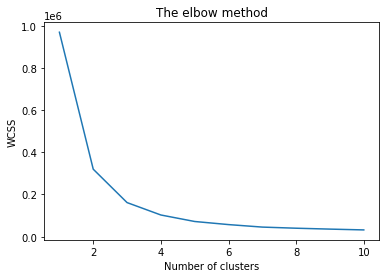

In [77]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [78]:
 km = KMeans(n_clusters = 4)


In [79]:
km.fit(x) 

KMeans(n_clusters=4)

In [80]:
km_pred=km.predict(x)
     

In [81]:
km_pred

array([0, 3, 1, ..., 3, 0, 0])

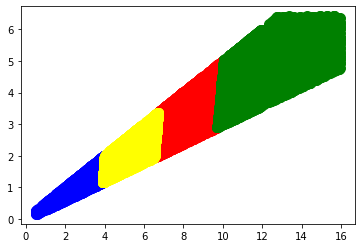

In [82]:
# visualization of clusters

plt.scatter(x[km_pred == 0, 0], x[km_pred == 0, 1], 
            s = 100, c = 'red')
plt.scatter(x[km_pred == 1, 0], x[km_pred== 1, 1], 
            s = 100, c = 'blue')
plt.scatter(x[km_pred == 2, 0], x[km_pred == 2, 1],
            s = 100, c = 'green',)
plt.scatter(x[km_pred == 3, 0], x[km_pred == 3, 1],
           s = 100, c = 'yellow',)
plt.show()


     

In [83]:
x[km_pred == 4, 0]

array([], dtype=float64)

In [84]:
data[data['store_sales(in millions)'].isin(x[km_pred == 0, 0])]

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost,profit
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,5415.0,3610.0,1,1,1,1,1,"Daily Paper, Radio",126.62,4.6368
9,Breakfast Foods,Frozen Foods,Food,9.72,4.5684,3.0,High Roller Savings,USA,S,F,...,5415.0,3610.0,1,1,1,1,1,"Daily Paper, Radio",84.16,5.1516
10,Breakfast Foods,Frozen Foods,Food,9.72,4.0824,3.0,Green Light Days,USA,S,M,...,5415.0,3610.0,1,1,1,1,1,Daily Paper,66.27,5.6376
14,Breakfast Foods,Frozen Foods,Food,7.48,3.1416,4.0,Price Savers,USA,S,F,...,5415.0,3610.0,1,1,1,1,1,"Sunday Paper, Radio",80.29,4.3384
15,Breakfast Foods,Frozen Foods,Food,6.56,3.2800,4.0,Cash Register Lottery,USA,M,M,...,5415.0,3610.0,1,1,1,1,1,"Daily Paper, Radio",59.86,3.2800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60415,Specialty,Carousel,Non-Consumable,9.20,4.6000,4.0,Shelf Emptiers,Mexico,S,M,...,4149.0,2766.0,1,0,1,1,1,"Daily Paper, Radio",147.82,4.6000
60418,Specialty,Carousel,Non-Consumable,8.28,2.7324,3.0,Save-It Sale,Mexico,M,M,...,3671.0,2447.0,0,0,0,0,0,In-Store Coupon,67.63,5.5476
60419,Specialty,Carousel,Non-Consumable,6.90,2.8290,3.0,Two Day Sale,Mexico,S,M,...,3671.0,2447.0,0,0,0,0,0,Radio,73.27,4.0710
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,4193.0,2795.0,1,0,0,0,1,Sunday Paper,132.88,5.7132


In [85]:
data[data['store_sales(in millions)'].isin(x[km_pred == 1, 0])]

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost,profit
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,5415.0,3610.0,1,1,1,1,1,"Daily Paper, Radio",84.16,2.3184
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,5415.0,3610.0,1,1,1,1,1,In-Store Coupon,95.78,2.5024
7,Breakfast Foods,Frozen Foods,Food,3.74,1.6082,2.0,Cash Register Lottery,USA,S,M,...,5415.0,3610.0,1,1,1,1,1,"Daily Paper, Radio",59.86,2.1318
11,Breakfast Foods,Frozen Foods,Food,3.28,1.5416,2.0,Bag Stuffers,USA,S,M,...,5415.0,3610.0,1,1,1,1,1,Product Attachment,82.62,1.7384
39,Breakfast Foods,Frozen Foods,Food,3.28,1.6072,2.0,Double Down Sale,USA,S,F,...,7041.0,4694.0,1,0,1,1,1,TV,95.74,1.6728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60417,Specialty,Carousel,Non-Consumable,2.97,1.0692,3.0,Dollar Cutters,Mexico,M,F,...,3671.0,2447.0,0,0,0,0,0,Bulk Mail,119.26,1.9008
60421,Specialty,Carousel,Non-Consumable,0.99,0.4554,1.0,Green Light Special,USA,S,F,...,4294.0,2863.0,1,0,0,0,0,Cash Register Handout,127.19,0.5346
60422,Specialty,Carousel,Non-Consumable,1.21,0.4477,1.0,Unbeatable Price Savers,USA,S,F,...,4294.0,2863.0,1,0,0,0,0,"Sunday Paper, Radio",78.45,0.7623
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,4294.0,2863.0,1,0,0,0,0,In-Store Coupon,95.25,1.4352


Conclusion: This project could be useful for food marts of USA,Canda,Maxico to make better decisions about their media campaigns. By  understanding the  different factors, the company can optimize their spending on promotions and advertising  to effectively acquire new customers by considering in which cluster they are and which method  suitable for them keeping the cost low.